# Iris Classification

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# Loading the Iris Dataset
iris = pd.read_csv("Iris.csv")

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Removing the Unwanted columns
iris.drop('Id', axis = 1, inplace = True)

In [6]:
# Dimensions of te Data
iris.shape

(150, 5)

In [7]:
# Statistical summary of all attributes
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# To know how many variety of species are present in the data
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Understanding the IRIS dataset

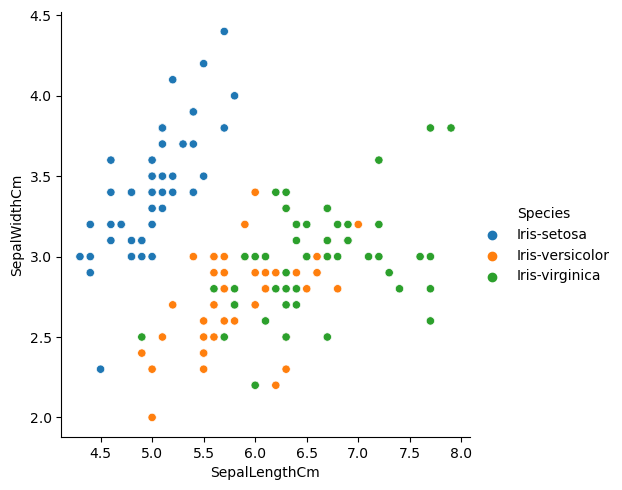

In [9]:
#relational plot 
sb.relplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = iris, hue = 'Species')

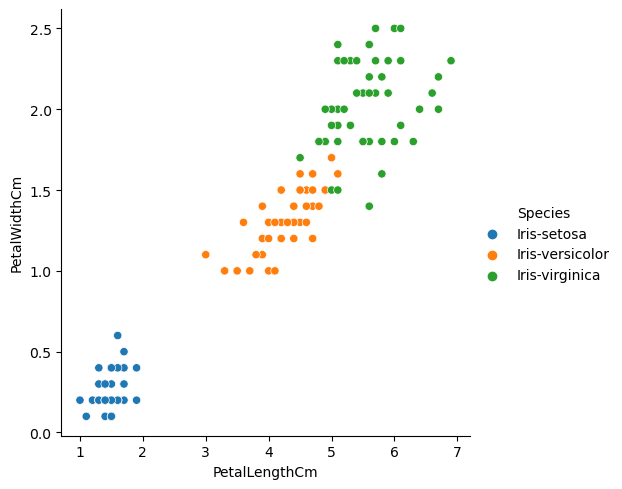

In [10]:
sb.relplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = iris, hue = 'Species')

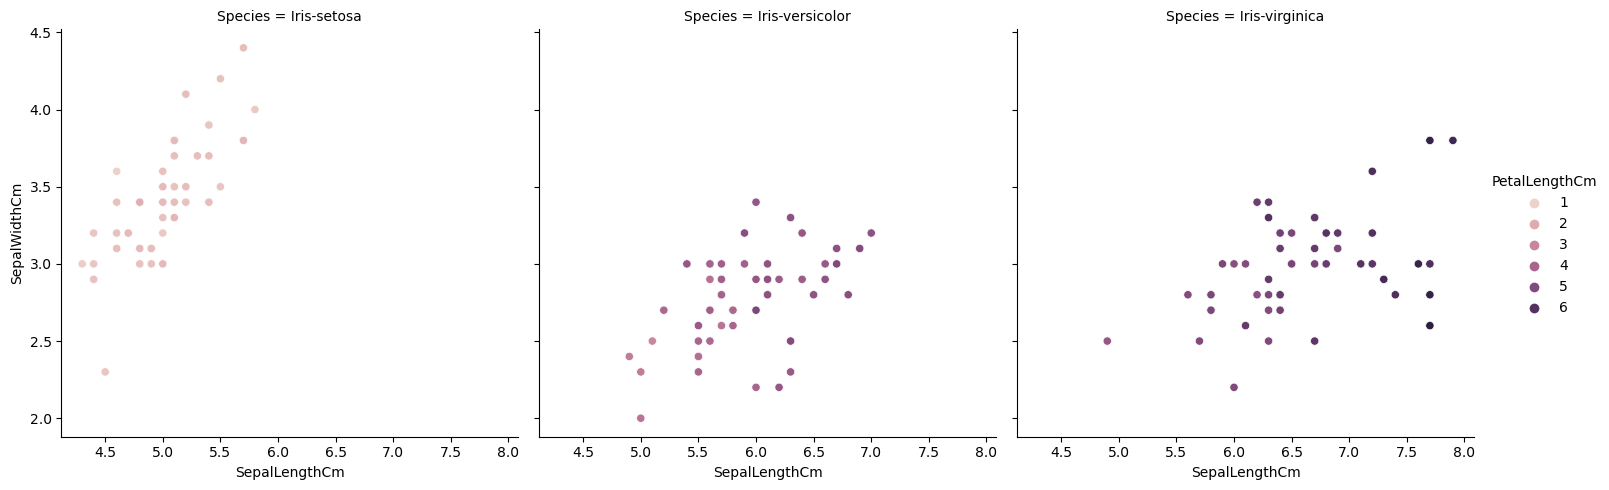

In [11]:
sb.relplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'PetalLengthCm', data = iris, col = 'Species')

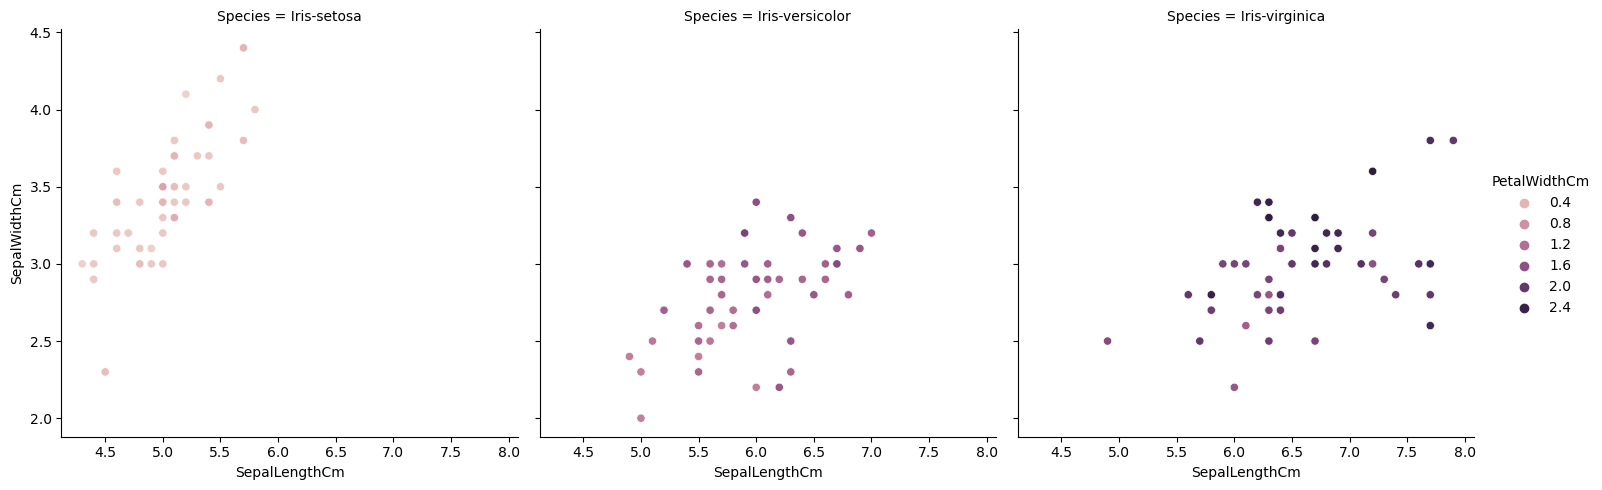

In [12]:
sb.relplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'PetalWidthCm', data = iris, col = 'Species')

Checking for Outliers

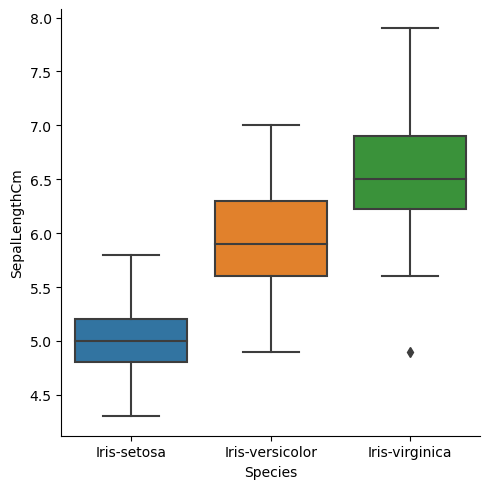

In [13]:
sb.catplot(x = 'Species', y = 'SepalLengthCm', data = iris, kind = 'box')

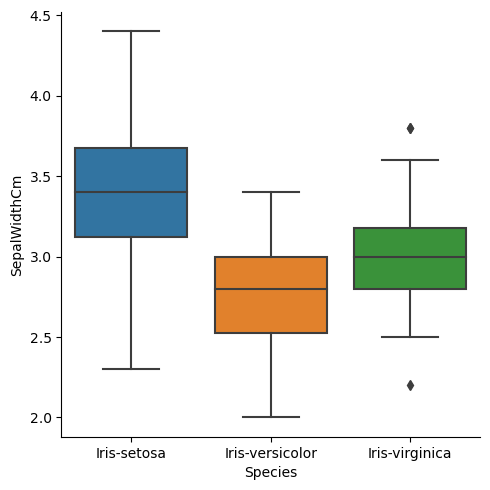

In [14]:
sb.catplot(x = 'Species', y = 'SepalWidthCm', data = iris, kind = 'box')

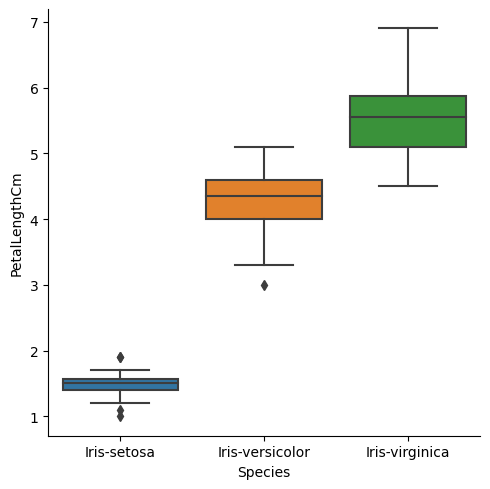

In [15]:
sb.catplot(x = 'Species', y = 'PetalLengthCm', data = iris, kind = 'box')

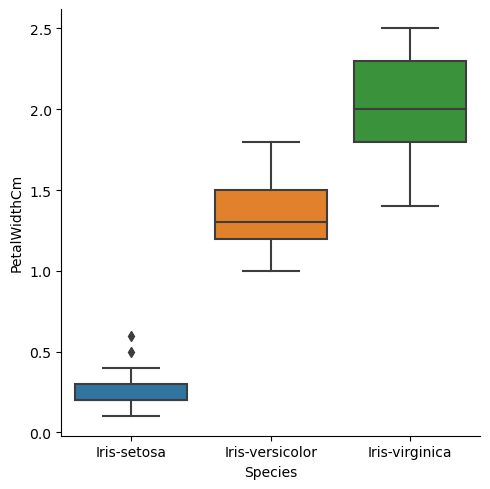

In [16]:
sb.catplot(x = 'Species', y = 'PetalWidthCm', data = iris, kind = 'box')

In [17]:
corr = iris.corr(method = 'pearson')
corr

/tmp/ipykernel_102/1942783195.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris.corr(method = 'pearson')


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot: >

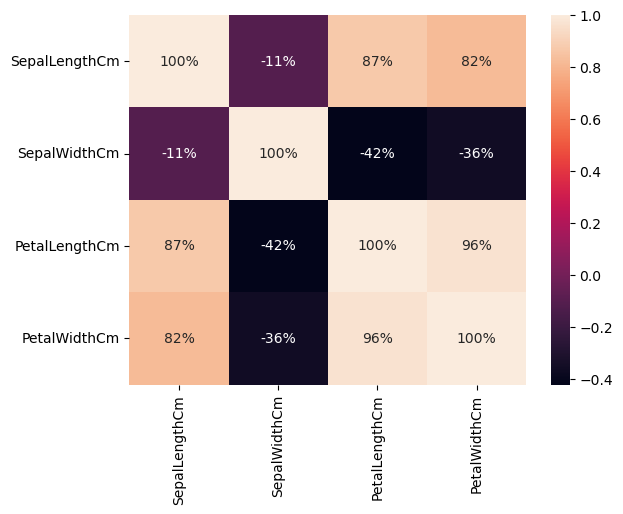

In [18]:
sb.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, fmt = '.0%')

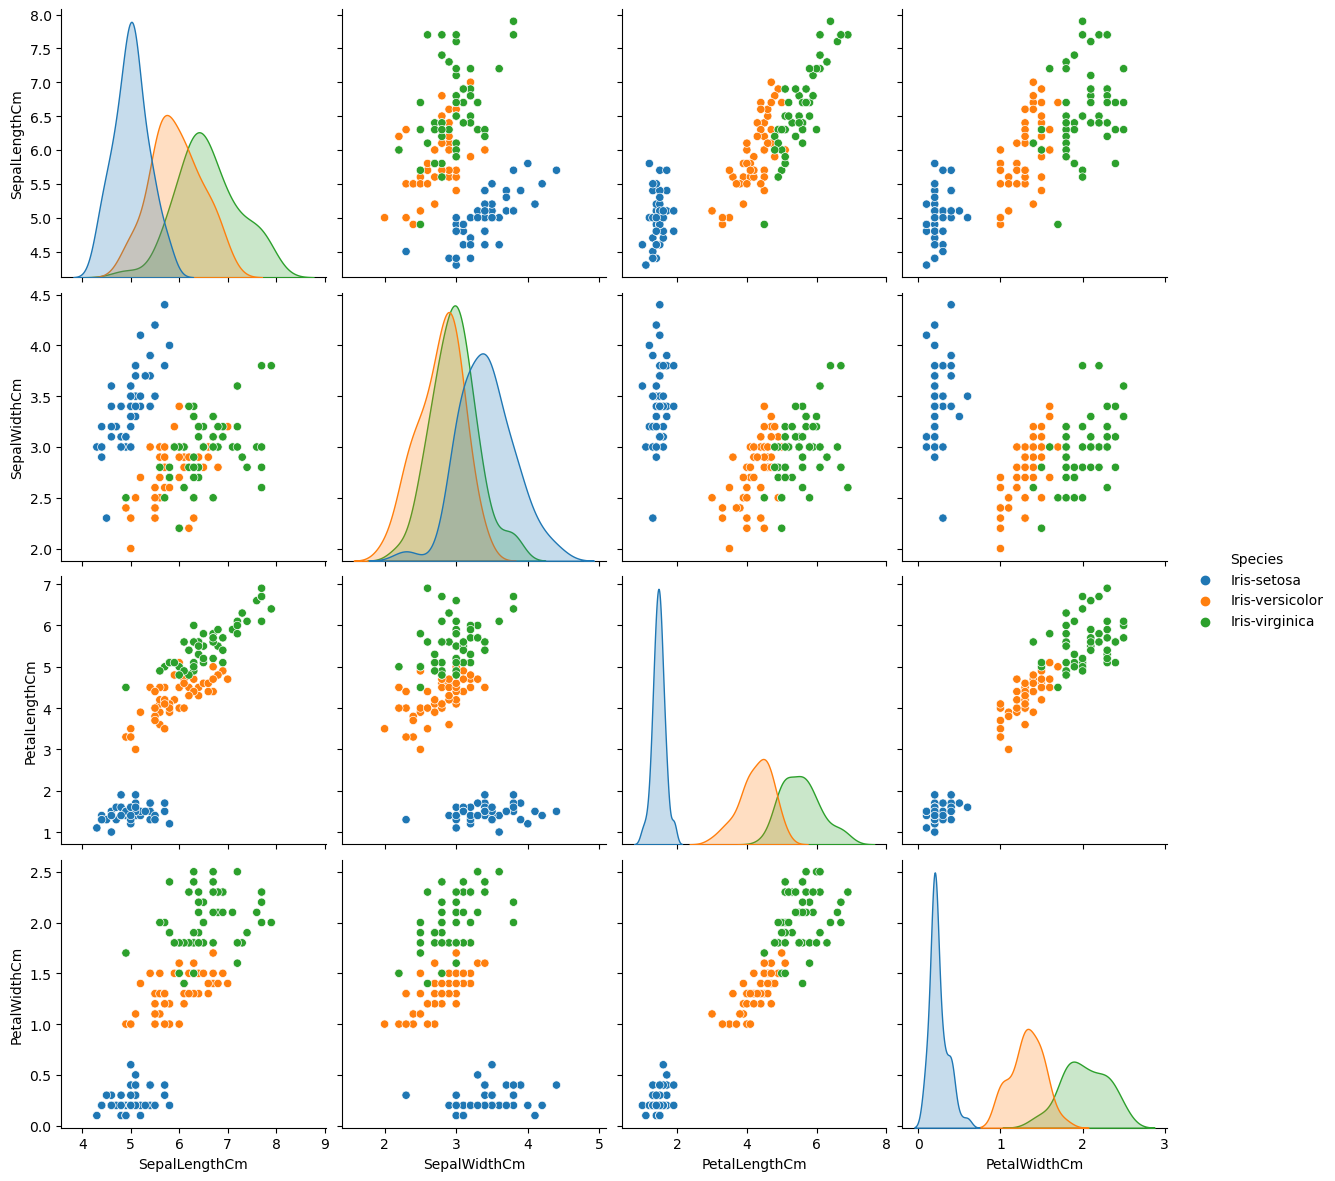

In [19]:
sb.pairplot(data = iris, hue = 'Species', height = 3)

# Model Creation

In [20]:
# Selecting Dependent and Independent Variables
X = iris.iloc[:, [1, 3]].values
y = iris.iloc[:, -1].values

In [21]:
from sklearn.preprocessing import LabelEncoder
species_encoder = LabelEncoder()
species_encoder.fit(y)

y = species_encoder.transform(y)

In [22]:
# Splitting into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 2), (45, 2), (105,), (45,))

In [23]:
from sklearn import svm, tree
from sklearn.metrics import accuracy_score, confusion_matrix

classifier = svm.SVC(gamma = 'auto', kernel = 'rbf')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Accuracy Score\t:\t", accuracy_score(y_test, y_pred))
print("Confusion Matrix\t:\t")
print(confusion_matrix(y_test, y_pred))

Accuracy Score	:	 1.0
Confusion Matrix	:	
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [24]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

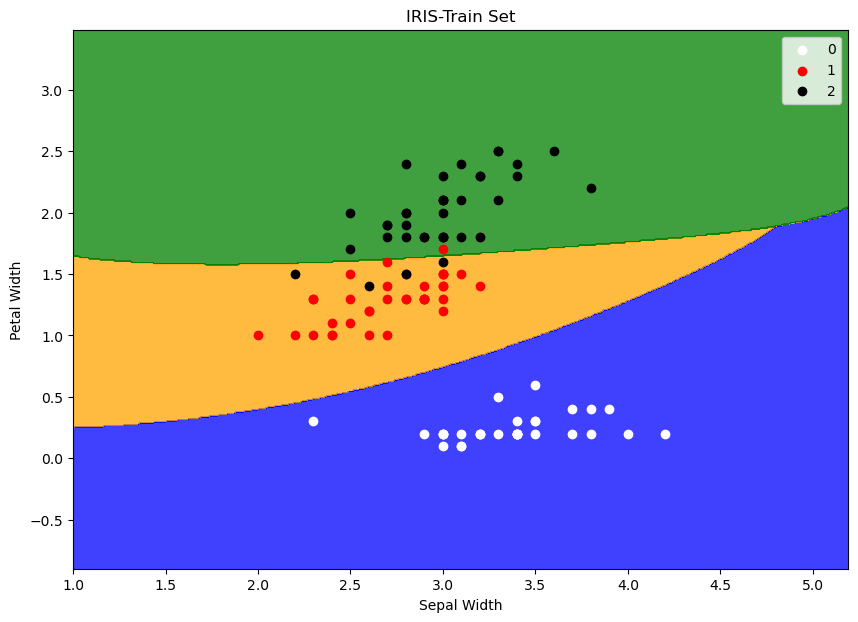

<Figure size 640x480 with 0 Axes>

In [25]:
plt.figure(figsize = (10, 7))

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('blue', 'orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = [ListedColormap(('white', 'red', 'black'))(i)], label = j)


plt.title('IRIS-Train Set')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()
plt.show()
plt.savefig("train.png")

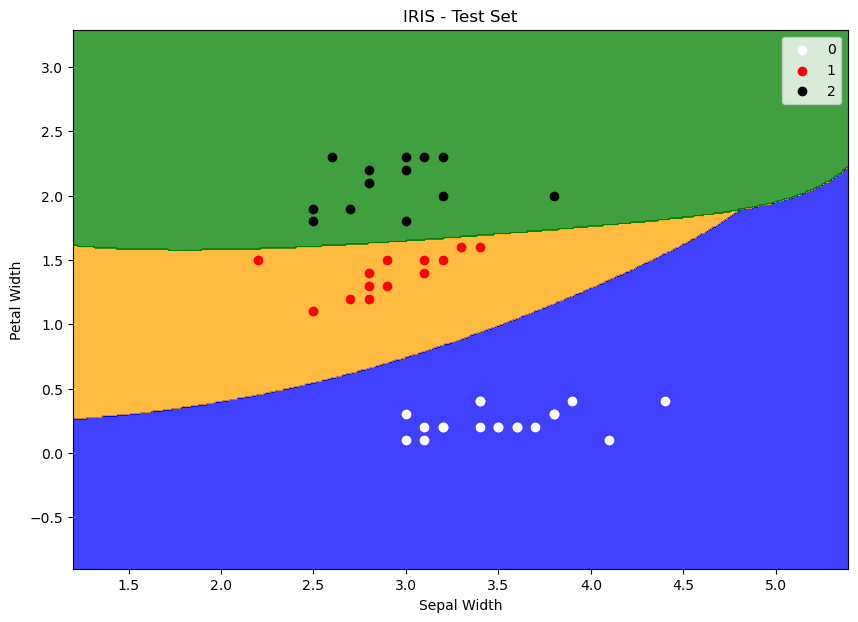

<Figure size 640x480 with 0 Axes>

In [26]:
plt.figure(figsize = (10, 7))

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('blue', 'orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = [ListedColormap(('white', 'red', 'black'))(i)], label = j)
    
plt.title('IRIS - Test Set')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

plt.savefig("test.png")